In [1]:
import numpy as np
from os.path import join as pjoin
import matplotlib.pyplot as plt

# Quijote

Compare the distributions of halo masses, positions and velocities from Quijote to those obtained using `rho_to_halo`

rho_to_halo velocity std: 181.0894367679987
quijote velocity std: 171.59491
ratio: 0.9475699562079163


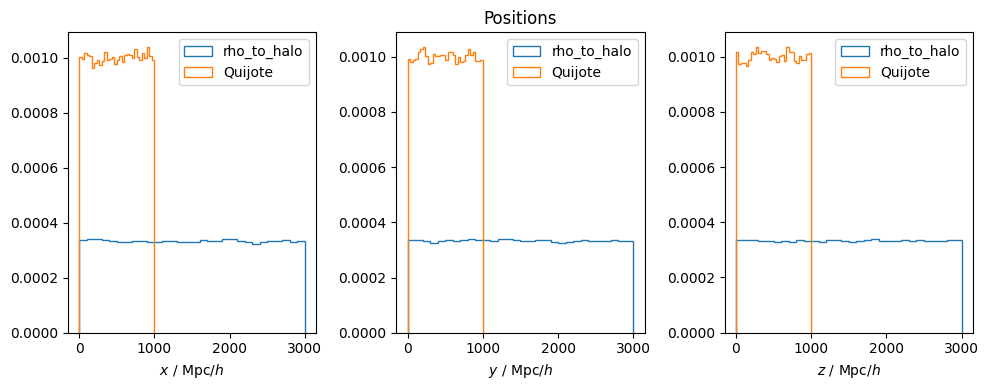

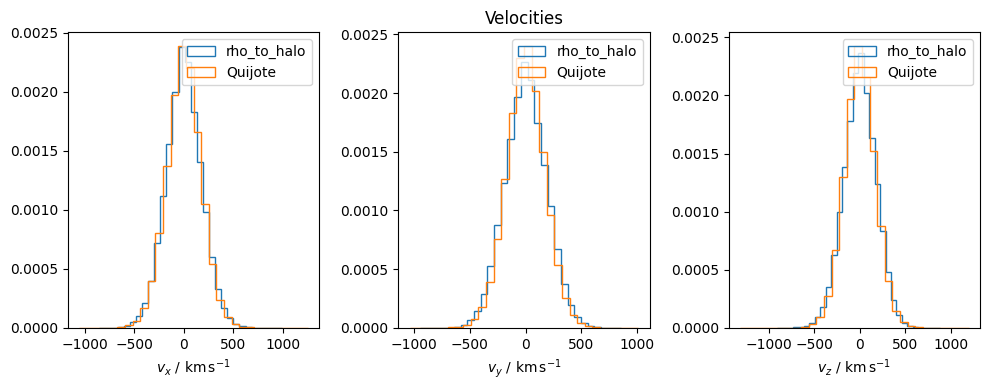

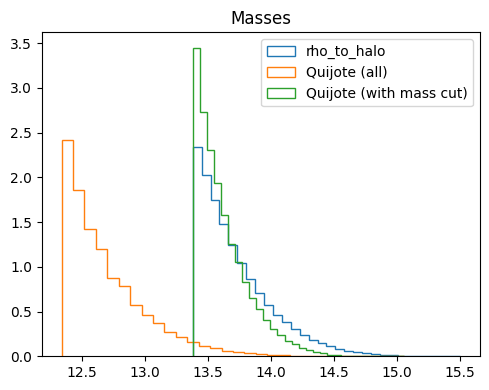

In [16]:
cmass_dir = '/home/mattho/git/ltu-cmass/data/pmwd/L3000-N384/3'
quijote_dir = '/data101/bartlett/quijote/Halos/latin_hypercube_HR/9/'

hist_kwargs = {'density':True, 'histtype':'step', 'bins':30}

fig, axs = plt.subplots(1, 3, figsize=(10,4))
x_cmass = np.load(pjoin(cmass_dir, 'halo_pos.npy'))
x_quijote = np.load(pjoin(quijote_dir, 'halo_pos.npy'))
for i in range(3):
    axs[i].hist(x_cmass[:,i], label='rho_to_halo', **hist_kwargs)
    axs[i].hist(x_quijote[:,i], label='Quijote', **hist_kwargs)
    axs[i].legend()
axs[0].set_xlabel(r'$x \ / \ {\rm Mpc}/h$')
axs[1].set_xlabel(r'$y \ / \ {\rm Mpc}/h$')
axs[2].set_xlabel(r'$z \ / \ {\rm Mpc}/h$')
axs[1].set_title('Positions')
fig.tight_layout()

fig, axs = plt.subplots(1, 3, figsize=(10,4))
v_cmass = np.load(pjoin(cmass_dir, 'halo_vel.npy'))
v_quijote = np.load(pjoin(quijote_dir, 'halo_vel.npy'))
for i in range(3):
    axs[i].hist(v_cmass[:,i], label='rho_to_halo', **hist_kwargs)
    axs[i].hist(v_quijote[:,i], label='Quijote', **hist_kwargs)
    axs[i].legend(loc='upper right')
axs[0].set_xlabel(r'$v_x \ / \ {\rm km \, s^{-1}}$')
axs[1].set_xlabel(r'$v_y \ / \ {\rm km \, s^{-1}}$')
axs[2].set_xlabel(r'$v_z \ / \ {\rm km \, s^{-1}}$')
axs[1].set_title('Velocities')
fig.tight_layout()
print('rho_to_halo velocity std:', v_cmass.std())
print('quijote velocity std:', v_quijote.std())
print('ratio:', v_quijote.std() / v_cmass.std())

fig, ax = plt.subplots(1, 1, figsize=(5,4))
m_cmass = np.load(pjoin(cmass_dir, 'halo_mass.npy'))
m_quijote = np.load(pjoin(quijote_dir, 'halo_mass.npy'))
ax.hist(m_cmass, label='rho_to_halo', **hist_kwargs)
ax.hist(m_quijote, label='Quijote (all)', **hist_kwargs)
ax.hist(m_quijote[m_quijote > m_cmass.min()], label='Quijote (with mass cut)', **hist_kwargs)
ax.legend()
ax.set_title('Masses')
fig.tight_layout()